# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

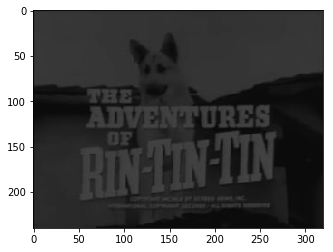

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

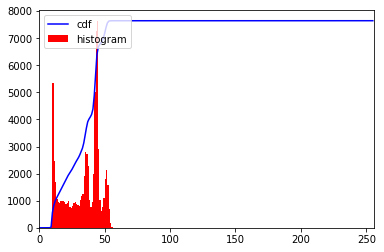

In [7]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1 - As faixas de cores não são bem aproveitadas.

In [9]:
def transformando(pixel):
    valor_max = rintin_gray.max()
    valor_min = rintin_gray.min()
    return ((float((pixel-valor_min))/valor_max)*255)

In [10]:
rintin_atualizado=[]

for i in rintin_gray:
    atualizando_valores = []
    for j in i:
        pixel = int(j)
        atualizando_valores.append(transformando(pixel))
    
    rintin_atualizado.append(atualizando_valores)

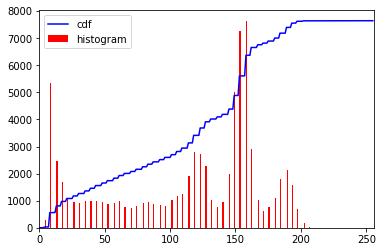

In [11]:
hist,bins = np.histogram(np.asarray(rintin_atualizado).flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(np.asarray(rintin_atualizado).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

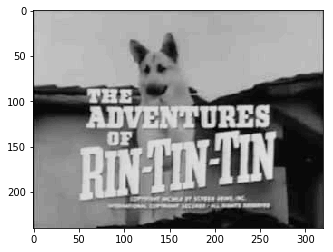

In [12]:
plt.imshow(rintin_atualizado, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [13]:
foto = cv2.imread('hall_box_battery1.jpg')

In [14]:
foto_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

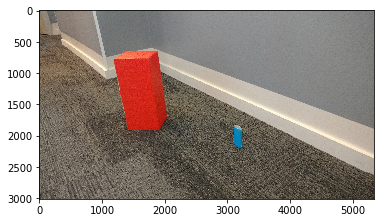

In [15]:
plt.imshow(foto_rgb)

In [16]:
foto_r = foto_rgb[:,:,0]

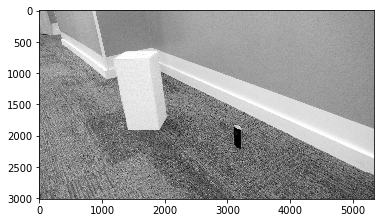

In [17]:
plt.imshow(foto_r, cmap='Greys_r')

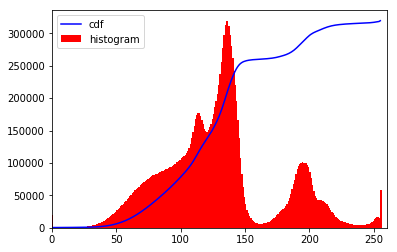

In [18]:
hist,bins = np.histogram(foto_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(foto_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,260])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [19]:
foto_b = foto_rgb[:,:,2]

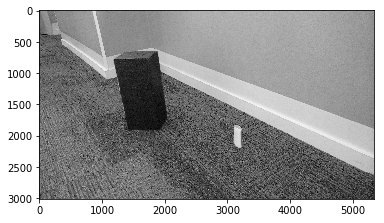

In [20]:
plt.imshow(foto_b, cmap='Greys_r')

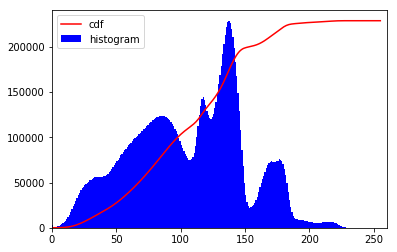

In [21]:
hist,bins = np.histogram(foto_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'r')
plt.hist(foto_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,260])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Pelos canais R e B é possível identificar a caixa vermelha e a bateria azul.

### 1)

Analisando os canais R e B, não é possível identificar a caixa e a bateria porque ao fundo tem uma parede branca que contem as cores azul e vermelha, que ao separar pelas cores, também fica branca, fazendo com que seja possível que o computador se confunda entre o que é objeto e o que é parede. O mesmo acontece com os histogramas. Ao observar o histograma vemos vários picos da cor azul e vários da cor vermelha, fazendo com a identificação não seja possível por conta da confusão entre parede e objeto.

Porém ao fazer a observação conjunta dos canais R e B e o histograma, fica possível identificar a caixa e a bateria, pois um complementa o outro.

In [22]:
realce = foto_r - 0.99*foto_b
#plt.imshow(realce, cmap='Greys_r')

In [23]:
realce.shape

(3006, 5344)

In [36]:
saida = np.zeros(realce.shape, dtype="uint8")

for i in range(realce.shape[0]):
    for j in range(realce.shape[1]):
        if realce[i][j] > 119:
            saida[i][j] = 255


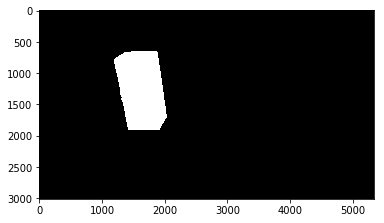

In [37]:
plt.imshow(saida, cmap='Greys_r')